# Guide for creating machine learning model to predict if credit card shall be approved or denied 

#    Install needed libraries to train our model and to do pre processing 

In [81]:
! pip3 install pandas
! pip3 install numpy
! pip3 install sklearn
! pip3 install matplotlib
! pip3 install scipy
! pip3 install seaborn

You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.
You are using pip version 9.0.3, however version 10.0.0 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


# Import needed libraries

In [82]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.externals import joblib



# Reading data from csv file

In [83]:
df = pd.read_csv("data.csv")

In [84]:
print (df)

     YearsEmployed  PriorDefault  Credi1Score  Income  approved
0            1.250             1            1       0         1
1            3.040             1            6     560         1
2            1.500             1            0     824         1
3            3.750             1            5       3         1
4            1.710             1            0       0         1
5            2.500             1            0       0         1
6            6.500             1            0   31285         1
7            0.040             1            0    1349         1
8            3.960             1            0     314         1
9            3.165             1            0    1442         1
10           2.165             0            0       0         1
11           4.335             1            0     200         1
12           1.000             1            0       0         1
13           0.040             0            0    2690         1
14           5.000             1        

# Removing outliers and data preprocessing

In [85]:
filt_df = df.loc[:, df.columns != 'PriorDefault']
filt_df = filt_df.loc[:, filt_df.columns != 'Credi1Score']
filt_df = filt_df.loc[:, filt_df.columns != 'approved']


In [86]:
low = .05 ## IQR TEST TO REMOVE OUTLIERS
high = .95
quant_df = filt_df.quantile([low, high])
print(quant_df)

      YearsEmployed  Income
0.05         0.0000     0.0
0.95         8.5375  4021.3


In [87]:
filt_df = filt_df.apply(lambda x: x[(x>quant_df.loc[low,x.name]) & 
                                    (x < quant_df.loc[high,x.name])], axis=0)

In [88]:
filt_df = pd.concat([df.loc[:,'PriorDefault'],df.loc[:,'Credi1Score'],df.loc[:,'approved'], filt_df], axis=1)

In [89]:
filt_df.dropna(inplace=True)
print (filt_df)

     PriorDefault  Credi1Score  approved  YearsEmployed  Income
1               1            6         1          3.040   560.0
2               1            0         1          1.500   824.0
3               1            5         1          3.750     3.0
7               1            0         1          0.040  1349.0
8               1            0         1          3.960   314.0
9               1            0         1          3.165  1442.0
11              1            0         1          4.335   200.0
13              0            0         1          0.040  2690.0
17              1           10         1          3.170   245.0
20              1           17         1          2.500  1208.0
22              1            6         1          7.875  1260.0
23              1            1         1          3.085    11.0
33              1            0         1          5.000  4000.0
34              1            5         1          0.415   560.0
35              1           11         1

# BOX Plot to visualize

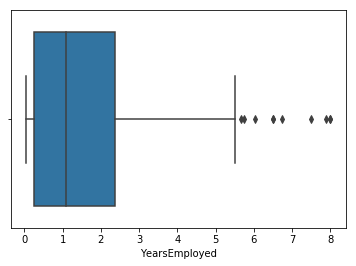

In [90]:
sns.boxplot( x=filt_df["YearsEmployed"] )

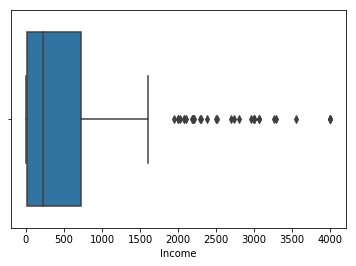

In [91]:
sns.boxplot( x=filt_df["Income"] )

# Data Normality Test

In [92]:
normalityTestforCreditCardScore = stats.normaltest(filt_df['YearsEmployed'])

In [93]:
if normalityTestforCreditCardScore[1]>0.05:
    print ("data1 is normally distributed ")
else:
    print ("data1 is not normally distributed ")


data1 is not normally distributed 


In [94]:
normalityTestforIncome = stats.normaltest(filt_df['Income'])

In [95]:
if normalityTestforIncome[1]>0.05:
    print ("data1 is normally distributed ")
else:
    print ("data1 is not normally distributed ")

data1 is not normally distributed 


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


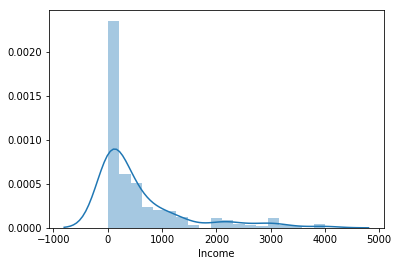

In [96]:
sns.distplot(filt_df['Income']);

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


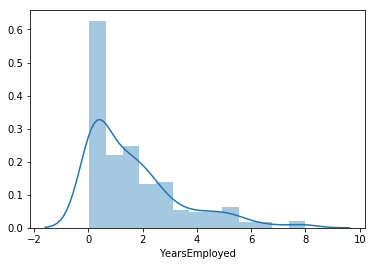

In [97]:
sns.distplot(filt_df['YearsEmployed']);

# Descriptive analyses for the dataset 

In [98]:
print (filt_df['YearsEmployed'].describe())


count    305.000000
mean       1.649049
std        1.706167
min        0.040000
25%        0.250000
50%        1.085000
75%        2.375000
max        8.000000
Name: YearsEmployed, dtype: float64


In [99]:
print (filt_df['Income'].describe())


count     305.000000
mean      576.865574
std       841.638247
min         1.000000
25%        18.000000
50%       225.000000
75%       730.000000
max      4000.000000
Name: Income, dtype: float64


# Seperate dataset into independent and dependent variables (Input and Output)

In [100]:
output = filt_df['approved']

In [101]:
input = filt_df
del input['approved']

# Divide my dataset to training and testing dataset 

In [102]:
X_train,Xtest,Ytrain,Ytest = train_test_split(input,output,test_size = 0.3 ,random_state =17)

# Multinomial Naive Bayes Model

In [103]:
MultiNB = MultinomialNB()
MultiNB.fit(X_train,Ytrain)
print (MultiNB)
y_predict = MultiNB.predict(Xtest)
print (accuracy_score(Ytest,y_predict))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.6847826086956522


# Bernoulli Naive Bayes Model

In [104]:
BurnNB = BernoulliNB()
BurnNB.fit(X_train,Ytrain)
print (BurnNB)
y_predict = BurnNB.predict(Xtest)
print (accuracy_score(Ytest,y_predict))

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
0.9347826086956522


# Implementing Simple Neural Network

In [105]:
scaler = StandardScaler() # to normalize your data 
scaler.fit(X_train)
# normalize both train and test
X_train = scaler.transform(X_train)
Xtest = scaler.transform(Xtest)
# normalization done here for MLP
mlp = MLPClassifier(hidden_layer_sizes=(20,20))
mlp.fit(X_train,Ytrain)
predictions = mlp.predict(Xtest)
print(classification_report(Ytest,predictions))
print(confusion_matrix(Ytest,predictions))
cm = confusion_matrix(Ytest,predictions)




             precision    recall  f1-score   support

          0       0.98      0.91      0.95        57
          1       0.87      0.97      0.92        35

avg / total       0.94      0.93      0.94        92

[[52  5]
 [ 1 34]]


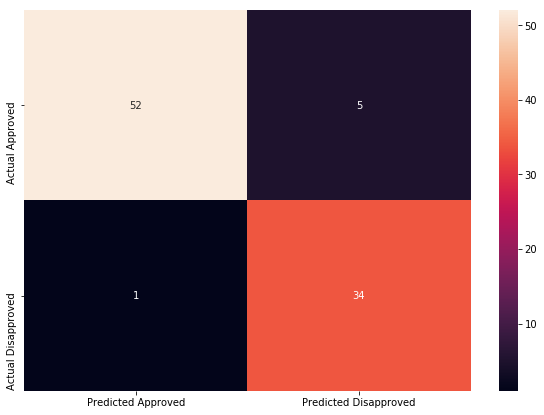

In [106]:
df_cm = pd.DataFrame(cm, index = ['Actual Approved','Actual Disapproved'],
                  columns = ['Predicted Approved','Predicted Disapproved'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)

# Pickling the Model

In [107]:
joblib.dump(BurnNB, 'model.pkl')

['model.pkl']